In [1]:
from utils import hdf5_getters
import os
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.types import *
import time

spark_session = SparkSession\
                .builder\
                .master("local") \
                .appName("first_notebook")\
                .getOrCreate()

spark_context = spark_session.sparkContext
sqlContext = SQLContext(spark_session)

In [2]:
df = spark_session.read \
    .option("header", "true")\
    .csv("songs.csv")\
    .cache()

distData = spark_session.parallelize()

AttributeError: 'SparkSession' object has no attribute 'parallelize'

In [3]:
df = df.withColumn("loudness", df["loudness"].cast(DoubleType()))
df = df.withColumn("tempo", df["tempo"].cast(DoubleType()))
df = df.withColumn("release_year", df["release year"].cast(IntegerType()))

In [4]:
df.printSchema()

root
 |-- track id: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- title: string (nullable = true)
 |-- loudness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- tags: string (nullable = true)
 |-- release year: string (nullable = true)
 |-- release_year: integer (nullable = true)



In [5]:
df.count()

10000

In [6]:
df.registerTempTable("songs")

start_time_query = time.clock()
spark_session.sql("select avg(tempo), release_year from songs group by release_year order by avg(tempo) desc").show()
end_time_query = time.clock()
run_time_query = end_time_query - start_time_query

+------------------+------------+
|        avg(tempo)|release_year|
+------------------+------------+
|139.33685714285716|        1977|
|137.51694444444445|        1979|
|137.26139999999998|        1976|
|         136.16196|        1971|
|         134.38385|        1978|
|           133.322|        1930|
|132.86585294117648|        1985|
|132.84029411764706|        1969|
|           131.442|        1958|
|131.06533333333334|        1927|
|129.17204166666667|        1972|
|128.80169724770647|        1996|
|128.76611067193673|        2008|
|128.47726190476197|        1993|
|127.96075000000002|        1981|
|127.95625000000001|        1984|
|127.90901562500005|        2000|
|127.63483333333333|        1966|
|127.54160000000005|        1995|
|126.89337499999999|        1980|
+------------------+------------+
only showing top 20 rows



In [7]:
print(run_time_query)

0.002889999999999837


In [28]:
tempo_results = spark_session.sql("select avg(tempo), release_year from songs group by release_year order by avg(tempo) desc").collect()

In [29]:
tempos = []
years = []
for result in tempo_results:
    tempos.append(round(result[0]))
    years.append(result[1])
print(years)

[1977, 1979, 1976, 1971, 1978, 1930, 1985, 1969, 1958, 1927, 1972, 1996, 2008, 1993, 1981, 1984, 2000, 1966, 1995, 1980, 1986, 1983, 2007, 2005, 2001, 1975, 1994, 1959, 2003, 1982, 1974, 1988, 1999, 2006, 2004, 1987, 2009, 2002, 1989, 1992, 1990, 1997, 1970, 0, 1991, 1962, 1963, 2010, 1956, 1998, 1968, 1967, 1973, 1929, 1947, 1964, 1957, 1961, 1940, 1926, 1934, 1960, 1965, 1954, 1953, 1950, 1935, 1955, 1936]


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

# pass a list of 2 lists containing x and y values
# pass label for x axis and label for y axis
def plotGraph(values, x_label, y_label):
    plt.subplots(figsize=(8,4), ncols=1)
    plt.plot(values[0], values[1])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
# example implementation
# plotGraph([[1,2,3,4], [2,4,6,9]], 'x-axis', 'y-axis')

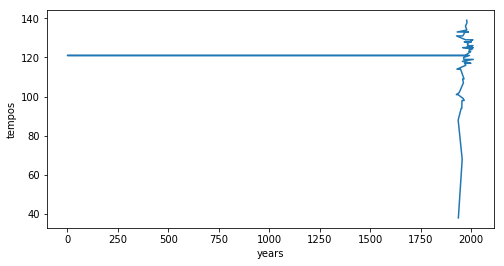

In [34]:
plotGraph([years, tempos], 'years', 'tempos')